In [16]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import ensemble
%matplotlib inline

Head
   target   F1  F2  F3  F4  F5  F6  F7  F8  F9  ...  F107  F108  F109  F110  \
0      -1  223   2   2   0   0   0   0   0   0  ...     0     0     0     0   
1       1  152   2   2   0   0   0   1   0  -1  ...     0     0     0     0   
2       1  131   2   2   0   0   0   1   0  -1  ...     0     0     0     0   
3       1  154   2   2   0   0   0   0   0   0  ...    -1     0     0     0   
4      -1  171   2   3   0   0   0   0   0  -1  ...     0     0     0     0   

   F111  F112  F113  F114  F115  F116  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 117 columns]
 
 
 
 
Description
             target            F1            F2            F3            F4  \
count  92650.000000  92650.000000  92650.000000  92650.000000  92650.000000   
mean       0.053038    175.864145      3.317572      2.384587     -0.001630   

Text(0.5, 257.44, 'Predicted Label')

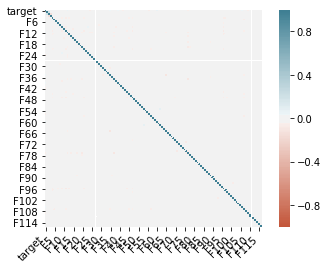

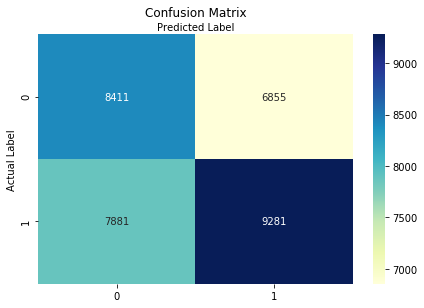

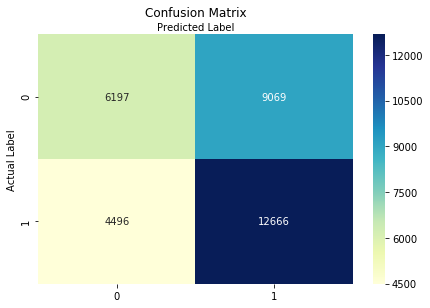

In [33]:


df = pd.read_csv('dota2train.csv')

print("Head")
print(df.head())
print(" ")
print(" ")
print(" ")
print(" ")

print("Description")
print(df.describe())
print(" ")
print(" ")
print(" ")
print(" ")

print("Check for blank values")
print(df.isnull())
print(" ")
print(" ")
print(" ")
print(" ")

print("Shape of the dataset")
print(df.shape)
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")




print("Correlation Chart")
corr = df.corr()
chart = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

df.columns = ['target','F1','F2','F3','F4','F5','F6','F7','F8','F9','F10',
              'F11','F12','F13','F14','F15','F16','F17','F18','F19','F20',
              'F21','F22','F23','F24','F25','F26','F27','F28','F29','F30',
              'F31','F32','F33','F34','F35','F36','F37','F38','F39','F40',
              'F41','F42','F43','F44','F45','F46','F47','F48','F49','F50',
              'F51','F52','F53','F54','F55','F56','F57','F58','F59','F60',
              'F61','F62','F63','F64','F65','F66','F67','F68','F69','F70',
              'F71','F72','F73','F74','F75','F76','F77','F78','F79','F80',
              'F81','F82','F83','F84','F85','F86','F87','F88','F89','F90',
              'F91','F92','F93','F94','F95','F96','F97','F98','F99','F100',
              'F101','F102','F103','F104','F105','F106','F107','F108','F109','F110',
              'F111','F112','F113','F114','F115','F116']






######RANDOM FOREST CLASSIFIER###########


print("RANDOM FOREST CLASSIFICATION MODEL")
#After seeing which variables, when removed, imporved accuracy, they were collectively removed in an ultimate test.
x = df.drop(['target','F1','F10','F23','F27',
             'F56','F61','F63','F64','F68','F69'],axis = 1)
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=12340)
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)
model.score(x_test, y_test)
y_pred = model.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')





print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")
print(" ")








######GRADIENT BOOSTING CLASSIFIER###########
print("GRADIENT BOOSTING CLASSIFICATION MODEL")

gb_clf = ensemble.GradientBoostingClassifier()
#After seeing which variables, when removed, imporved accuracy, they were collectively removed in an ultimate test.
x = df.drop(['target','F1','F10','F23','F27',
             'F56','F61','F63','F64','F68','F69'],axis = 1)
y = df.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=12340)

gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)
y_pred = gb_clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')



RANDOM FOREST


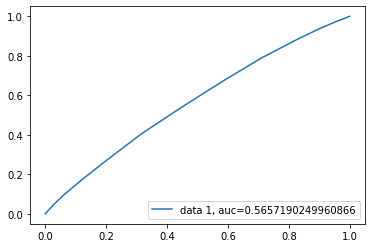

In [34]:
print("RANDOM FOREST")
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

GRADIENT BOOSTING


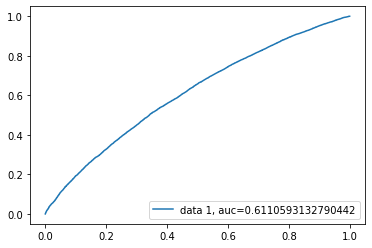

In [35]:
print("GRADIENT BOOSTING")
y_pred_proba = gb_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()